# Problems
(Lets use Honda accord 2018 to specify the basic car features and Yes marina circuit to define the track features except the shape itself)
- Come up with 4 different scenarios
       we can have scenarios of banked track(this might be 
       difficult), if the road is wet, different car specs, making it more realistic......
- Use final question in HW5 to use time thing, how to define modifiable length variables in julia because k which is number of timepoints(seconds) is what out minimizing factor will be 
-If have time do the max turning of car with other scenarios
- Max turn using acceleration not working
- track constraints
- thrust magnitude stuff

# TODO 
- How to create section hyperlinks for table of content
-MAke the write up pretty
-Add images
-COnvert equations by latex

Brief description of the problem. 
real data? where will you find it and how much will you need?
Features planned to use: 
Type of model (LP, QP, MIP, etc.)
approximate count of the number of variables and constraints in the model:

--Introduction (15%): The first few sentences should give a quick overview of the entire project. Then, elaborate with a description of the problem that will be solved, a brief history (with citations) of how the problem came about, why it’s important/interesting, and any other interesting facts you’d like to talk about. You should address and explain where the problem data is coming from (research? the internet? synthetically generated?) Also give an outline of the rest of the report. This section should be 300-600 words long and accessible to a student that has not taken the course.)
--Mathematical model (20%): A discussion of the modeling assumptions made in the problem (e.g. is it from physics? economics? something else?). Explain the decision variables, the constraints, and the objective function. Finally, show the optimization problem written in standard form. Discuss the model type (LP, QP, MIP, etc.). Equations should be formatted in LaTeX within the IJulia notebook. This section should be accessible to a student that has taken the course)
--Solution (25%): Here, you should code up your model in Julia + JuMP and solve it. Your code should be clean, easy to read, well annotated and commented, and it should compile! You are not allowed to use other programming languages or DCP packages such as convex.jl. I will be running your code. I suggest having multiple code blocks separated by text blocks that explain the various parts of your solution. You may also solve several versions of your problem with different models/assumptions.
--Results and discussion (25%): Here, you display and discuss the results. Show figures, plots, images, trade-off curves, or whatever else you can think of to best illustrate your results. The discussion should explain what the results mean, and how to interpret them. You should also explain the limitations of your approach/model and how sensitive your results are to the assumptions you made.
--Conclusion (5%): Summarize your findings and your results, and talk about at least one possible future direction; something that might be interesting to pursue as a follow-up to your project. Be specific enough with your follow-up idea to show that you have given it some thought and that you think it’s actually doable!

# Race Track Optimization
Sparsh Agarwal & Sam Lasch

# Table of Contents

1. [Introduction](#introduction)
2. [Mathematical Model](#mathematical)
3. Solutions
4. Result and discussion
5. Conclusion
6. Appendix

<a id="introduction"></a>
# 1. Introduction
![alt text](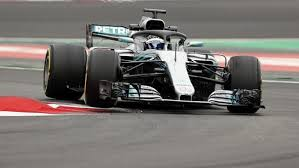 "Formula One Car Rounding A Curve")

Our project idea focused on optimizing how a Formula one car would drive around a two curve track. Specifically, given a fixed amount of time, and a track parameter; what is the optimal path that the car could would take around the curve. This gives us information on the minimum amount of time required for a racecar to navigate a track curve. 
    
This problem is based in formula one racing.  Formula one is the highest class of auto racing and has an estimated 2.9-billion-dollar investment in auto technology by the teams each year. (Wikipedia) Thus optimizing track routes can help improve driver efficiency, as well as car engineering, and improve the performance of both cars and racers. Navigating a curve is the hardest part of the track because corners are the main location where speed is lost. Thus, this problem of navigating curves is one of the primary problems related to racing. Formula One cars use a series of aerodynamic qualities to maximize turning speed with down forcing, which matches our model by allowing us to ignore air resistance on a curve.
       
Our problem space included limits on turning ability, speed of the car, acceleration of the car, and friction applied to the car as it drives. These constraints ensure the car is forced to account in speed as it rounds a curve, and is not able to make impossibly sharp curves. We were able to adjust the direction so that the car would only be able to move in the forward direction and not be able to move in a direction opposite the wheel direction. 

We applied several mathematical functions that correlated real world Physical constraints to the model. These were gravity, friction, and Centripetal force. We ignored air resistance because of the magnitude of difficulty that would apply to the model. Also, it would mean considering the mechanics and dimensionality of car, which we are not taking into account. We consider the car a point mass. We gathered the general information from sources on the internet, then developed the equations and constraints to apply to the model. 
    
We will elaborate on the formation of the mathematical equations and models that we applied. Then we will address the several different scenarios we created. 


<a id="mathematical"></a>
# 2. Mathematical Model
This problem deals with the physics involved in making a car move. Particularly we aim at providing the optimal path that a car should take on a race track ensuring that all the laws of physics and mechanical and gravitational constraints are satisfied. 

To create an apt mathematical model, we had to proceed in stages because the realistic motion of a car on a track consists of many interlinked equations and implementing them all at ones might produce error prone code.  Since we can use two different frames of reference for the motion (i.e. the inertial frame of reference where everything is in respect of car, and the track frame of reference where everything is in external frame of the track. We use the external frame of reference to make equations less complicated and to avoid dealing with trigonometric coordinates. Also, this was beneficial because the car itself has minimalistic features. Most of the constraints and features are associated with either the track or the motion itself. Stages in which we incremented the complexity of model are as follows, these will help understand the model.
    
### Stage 1:
4 essential 2D variables are introduced P(position), v(velocity) and AccDM(acceleration in direction of motion), AccCent(acceleration in centripital direction). Where each index along the row determines its value in that time istance. I.e. P[1,1] would tell what is the x coordinate of position at time of 1 sec and P[2,1] is the y location at time 1 sec. To make things simpler we move in time steps of 1 sec. Such that velocity at time T will be calculated using velocity at T-1 sec. Time is treated as an integral quantity and intermediate continuous values are ignored. The three equations responsible to make a car move on an arbitrary path with arbitrary velocity and acceleration are:
    
        @constraint(m, v[1,t+1] == v[1,t] + AccDM[1,t]  + AccCent[1,t])
        @constraint(m, v[2,t+1] == v[2,t] + AccDM[2,t]  + AccCent[2,t])  
        @constraint(m, P[1,t+1] == P[1,t] + v[1,t] + (.5)*(AccDM[1,t]  + AccCent[1,t])) 
        @constraint(m, P[2,t+1] == P[2,t] + v[2,t] + (.5)*(AccDM[2,t]  + AccCent[2,t]))
        
These are derived from motion constraints, $v = u +at^2$ where velocity $v$ after time is the sum of initial velocity $u$ and acceleration $a$ multiplied by time $t$ squared. Position is derived from $S = ut + (1/2)at^2$, where $S$ is displacement, which is equal to sum of the distance traversed by initial velocity in time t $ut$ and the acceleration during that time multiplied by time squared $(1/2)at^2$. The time squared reduces to 1 because we are moving in time steps of 1 sec.
    
After constraining the initial and final position, car can move from one place another (assuming velocity, AccDM and AccCent are allowed to take any values). We then can constraint the initial and final velocities, their direction vector, and the max and min values that they can achieve. We can also constraint the convex set of values that P can take to make sure that P stays in a certain area only.
    
After applying these constraints and providing an arbitrary final k time stamp, the car can move keeping velocity, AccDM, AccCent and Position inside their constraints of max and min values, along with satisfying the laws of physics. If the final position cannot be reached then it means that the car needs more time than the given k to reach the destination given the following constraints.

        @constraint(m, (AccCent[1,t]^2)+(AccCent[2,t]^2) <= (cofla*g)^2)
        @constraint(m, ((AccDM[1,t]^2)+(AccDM[2,t]^2)) <= (Thrust[t]- (coflo*g))^2)
        @constraint(m, (v[1,t]^2)+(v[2,t]^2) <= maxv^2)
        
$(coflo*g)$ is the frictional force which the track applies in the direction opposite to the direction of motion. $(cofla*g)$ is also the max centripetal acceleration that the track can provide depending on the physical relations of tires and track material. This limits how much a car turn at a specific velocity which is given by $cofla*g >=v^2/r$ where “r” is the max radius of circle on which the car can turn at velocity $v$. We do not need to define this constraint because the first constraint above along with velocity increment equation implicitly define this constraint. These three ensure that the velocity, AccDM and AccCent do not go above their specified values. We assume that their min and max limits as magnitudes are symmetric.
    
We also need to make sure that $|AccCent| > 0$ only when either $|v|>0$ or $|AccDM|>0$ because centripetal force cannot work on a stationary body. This is implemented by 

    @constraint(m, (AccCent[1,t]^2)+(AccCent[2,t]^2) <= 999999*(((v[1,t]^2)+(v[2,t]^2))+((AccDM[1,t]^2)+(AccDM[2,t]^2))))

### Stage 2: 
The previous stage treats the car as a hovercraft i.e. acceleration direction is independent of the direction of motion, but this is not the case with a car. A car can only produce acceleration in its current direction of motion. To turn, it uses the frictional force produced between tires and track, which is applied perpendicular to direction of motion. Here we try to make the hovercraft behave more like a car. Since AccDM is a function of the direction of motion vector. It can be defined as:
     
        @NLconstraint(m, (P[1,t]-P[1,t-1])*AccCent[1,t] + (P[2,t]-P[2,t-1])*AccCent[2,t] == 0) 
                where (P[1,t]-P[1,t-1]) defines the direction of motion
                
        @NLconstraint(m, AccDM[1,t] == AccDMBeta[t]*(P[1,t]-P[1,t-1]))
        @NLconstraint(m, AccDM[2,t] == AccDMBeta[t]*(P[2,t]-P[2,t-1]))
        
Until now all the constraints were convex but to implement these physical equations we need nonlinear constraints. The first one keeps the AccCent perpendicular to direction of motion. The second and third constraints keep the AccDm along direction of motion. After applying these constraints, the car moves in a more realistic motion where the most of its motions are governed by the laws of physics (keeping in mind our assumptions.)

### Stage 3:
Now since the car can work properly, we need to focus on track constraints, which keep the car on track. We already defined the enclosed convex set of possible position values before, but in order to be able to move along a certain path inside that convex set, we need position respective to time constraints. i.e. we need to make sure that at each second the car is within the track and is moving incrementally towards its desired route, instead of taking a suboptimal route. Here we have two problems, one is to guess what will be the probable position of the car at a certain time and to use that as a position constraint keeping in mind the physical constraints of motion. We had initially tried to use a csv here as a constraint by using the variable values as indexes in that csv, and employing a constraint that the indexes should only take values which ensure that the csv value at that position is a value assigned to either track, finish line or start line. This did not work because we cannot use a JUmp variable as an index as it does not have any value. We were able to work around this indexing in future stages, but were still unable to use the csv file as a constraint for the track.
    
The second problem was to guess whether the car could even traverse our custom designed track given physical motion constraints, even with an extremely large finish time. The assumptions to these two problems contradict each other. If we assume that the car can eventually traverse the track in some arbitrary large finish time, it becomes hard to determine the position respective to time constraints for such large time stamps. And if we try to ensure that the car takes only limited time such that we can manually guess its position respective time constraints, then we would need to relax the physical laws of motions and their max/min values to allow the car to complete the track in a time close to the specified time. To solve this, we produce a tradeoff. We relax the AccCent and AccDM to allow them to take values larger that specified, minimizing the cost associated with how far they are from the optimal max/min value. We also relax the time that we think it would take for the car to compete the track by increasing the scarcity (minimizing 1 norm) of velocity and (Position-Finish) at some time stamps close to the final time stamp. These two costs together when minimized, create an objective that forces the car to take optimal path in min time while bringing the AccDM and AccCent closer to the optimal values. Here we can observe whether our track constraints and position respective time constraints are realistic given the physical motion constraints.

Since we could not use the csv to create our constraints, we tried something similar to model predictive control. Where we set the next probable optimal value for position at the next time stamp using the previous time and solved the model again for the optimal path. For this we had to create an iterative model that would incrementally find next optimal steps for each time instance, while minimizing our combined cost function simultaneously. 

To accomplish this, we created a function that would cross the position stamps obtained from the model with those in csv, and pass the initial position stamps that are valid into the model. With each iteration, the function sends additional position stamps to the model as the possible optimal value to set at. After this the model is solved again and the new position values are cross checked with the csv. With each iteration we try to further make the constraints strict to reduce the 2 costs we are trying to minimize.

For analysis purposes and troubleshooting, we store the parameter solution values for each variable and for each iteration. We will talk more about these in solution.



2.A. Assumptions
The mass of the car and the dimensions of car are not considered in the model. The car is assumed to be a point mass with zero mass. This elliminated issues related with topling of car, banked tracks etc.
Assumptions: Finish velocity and finish acceleration can be anything

2.B. Model
Stage 1 (Basic): Car moves in a straight line as hovercraft

    Parameter definition:

    Variable definition:

    Constraint:

    Objective function
    
Stage 2 : Car moves in a hypothetical constrained path (nonconvex) as hovercraft (get validity of position respective time constraints with relaxed physical motion constraints fbecause of turning)

    Parameter definition:

    Variable definition:

    Constraint:

    Objective function
    
    
Stage 3 : Car moves in straight line as a car (with max/min and AccDM/AccCent directional constraints applied)

    Additional Parameter:

    Additional Variable:

    Additional Constraint:

    Objective function
    
Stage 4 : Car moves in curved track as a car in a convex space race track while minimizing time to reach finish and the cost associated with how much are its motion constraints off from their limits to traverse

    Additional Parameter:

    Additional Variable:

    Additional Constraint:

    Objective function
    
Stage 5 : Car moves in curved track as car while minimizing time to reach finish and the cost associated with how much are its motion constraints off from their limits to traverse our hypothetical track.

    Additional Parameter:

    Additional Variable:

    Additional Constraint:

    Objective function
    
    
Stage 6 : Model predective control included

# 3. Solution

Stage 1 (Basic): Car moves in a straight line as hovercraft

In [ ]:
using Gurobi, Cbc, Mosek, PyPlot, JuMP, Ipopt

raw = readcsv("Book1.csv");
# print(raw[1032,650])
trackx = length(raw[:,1])
tracky = length(raw[1,:])
raw[1,1] = 28


## Tyre specs
coflo = 0.2 #coeffecient of friction longitudnal(in direction of motion)
cofla = 0.4 #coeffecient of friction lattitudnal(perpendicular to direction of motion of the front tyers when they turn)


## formula one car specs all specs in meters and seconds
g = 9.8  # gravitational pull in m/sec^2
maxacc = 14.2 # max acc in m/sec^2
maxv = 103.55 # max velocity in m/sec equivalent to 200km/hr

    
## Start ad Finish constraints
kstart =90 #28 optimal
extrak = 3 #probable extra time seconds
startPos = [50,1]
finishPos = [1000, 650]
startVel = [0,0]
finishVel = [0,0]
startAccDM = [0,0]
startAccCent = [0,0]
finishAccDM = [0,0]


    ##model
    m = Model(solver = IpoptSolver(print_level=0))
    # m = Model(solver = GurobiSolver())
    
    kstarttemp = kstart
    extraktemp = extrak
    
    ## Basic variables and their constraints
    @variable(m, P[1:2,1:kiteration])  # resulting position in x,y
    @variable(m, v[1:2,1:kiteration])
    @variable(m, -3.25*maxacc <= Thrust[1:kiteration] <= maxacc)  # thruster input
    @variable(m, AccDM[1:2,1:kiteration])
    @variable(m, AccDMBeta[1:kiteration])
    @variable(m, AccCent[1:2,1:kiteration])
    @constraint(m, P[:,1] .== startPos)
    @constraint(m, v[:,1] .== startVel)
    @constraint(m, AccCent[:,1] .== startAccCent)
    # @constraint(m, AccDM[:,1] .== startAccDM)
    @constraint(m, P[:,kiteration] .== finishPos)
    # @constraint(m, v[:,k] .== finishVel)
    # @constraint(m, AccDM[:,k] .== finishAccDM)
    # @NLexpression(m, finishDistance, sum((P[i,k]-finishPos[i])^2 for i in 1:2))
    @NLexpression(m, AccCentripital, sum((AccCent[1,i]^2)+(AccCent[2,i]^2)-(cofla*g)^2 for i in 1:kiteration))

    
    ## motion constraints
    for t in 1:kiteration
#         @constraint(m, (AccCent[1,t]^2)+(AccCent[2,t]^2) <= (cofla*g)^2)
        @constraint(m, (AccCent[1,t]^2)+(AccCent[2,t]^2) <= 1500) # (cofla*g)^2 = 15.3664
        @constraint(m, ((AccDM[1,t]^2)+(AccDM[2,t]^2)) <= (Thrust[t])^2)#- (coflo*g))^2)
        @constraint(m, (v[1,t]^2)+(v[2,t]^2) <= maxv^2)
    end
    for t in 2:kiteration-extrakiteration
        @constraint(m, (AccCent[1,t]^2)+(AccCent[2,t]^2) <= 999999*(((v[1,t]^2)+(v[2,t]^2))+((AccDM[1,t]^2)+(AccDM[2,t]^2)))) #|AccCent| > 0 only if (|v| > 0 || |AccDm| >0)
    end
    for t in 2:kiteration
        @NLconstraint(m, (P[1,t]-P[1,t-1])*AccCent[1,t] + (P[2,t]-P[2,t-1])*AccCent[2,t] == 0)
        @NLconstraint(m, AccDM[1,t] == AccDMBeta[t]*(P[1,t]-P[1,t-1]))
        @NLconstraint(m, AccDM[2,t] == AccDMBeta[t]*(P[2,t]-P[2,t-1]))
    #     @constraint(m, AccDM[1,t]*(P[2,t]-P[2,t-1]) >=  AccDM[2,t]*(P[1,t]-P[1,t-1]))
    #     @constraint(m, AccDM[1,t]*(P[2,t]-P[2,t-1]) <=  AccDM[2,t]*(P[1,t]-P[1,t-1]))
    end
    @constraint(m, AccDM[2,1] >= 0)
    @constraint(m, AccDM[1,1] >= 0)
    @constraint(m, AccDM[1,1] <= 0)
    for t in 1:kiteration-1    
        @constraint(m, v[1,t+1] == v[1,t] + AccDM[1,t]  + AccCent[1,t])
        @constraint(m, v[2,t+1] == v[2,t] + AccDM[2,t]  + AccCent[2,t])  
        @constraint(m, P[1,t+1] == P[1,t] + v[1,t] + (.5)*(AccDM[1,t]  + AccCent[1,t])) 
        @constraint(m, P[2,t+1] == P[2,t] + v[2,t] + (.5)*(AccDM[2,t]  + AccCent[2,t]))     
    end

    
    ##minimize time section in first | time and velocity in second (by maximizing scarcity of velocity=0 at the ends)
    #start
    # @variable(m, t1[1:20])
    # for i in 1:20
    #     @constraint(m, sum((P[:,i]-startPos).^2) <= t1[i] )
    #     @constraint(m, sum((P[:,i]-startPos).^2) >= t1[i] )
    # end
    # @NLexpression(m, startPosDis1Norm, sum(t1[i] for i in 1:20))
    
    #finish
    @variable(m, t2[kiteration-extrakiteration:kiteration])
    @variable(m, t2v[kiteration-extrakiteration:kiteration])
    for i in kiteration-extrakiteration:kiteration
        @constraint(m, sum((P[:,i]-finishPos).^2) <= t2[i] )
        @constraint(m, sum((P[:,i]-finishPos).^2) >= t2[i] )
        @constraint(m, sum((v[:,i]-[0,0]).^2) <= t2v[i] )
        @constraint(m, sum((v[:,i]-[0,0]).^2) >= t2v[i] )
    end
    @NLexpression(m, finishPosDis1Norm, sum(t2[i]+t2v[i] for i in kiteration-extrakiteration:kiteration))
    
    #Both
    # @NLexpression(m, maxTimeByScarcity, startPosDis1Norm+finishPosDis1Norm)


    ##extra work
    # for t in 2:k-1
    #     @expression(m, v1, v[:,t+1]-v[:,t])
    #     @constraint(m, ((v1[2]*v[2,t]+v1[1]*v[1,t]))/((v1[1]^2+v[2]^2)*(v[1,t]^2+v[2,t]^2)) <= cos(maxTu))
    # #     @NLconstraint(m, (atan(v[2,t]/v[1,t])-atan(v[2,t+1]/v[1,t+1])) >= -maxTu)
    # end


    ## Track boundaries variables and constraints
    ## old track position respective time constraints
    # @constraint(m, P[2,:] .<=(3/2)*P[1,:] + 1100)
    for t in 1:round(Int64,(25*kiteration)/kstart)
        @constraint(m, P[1,t] >= 0)
        @constraint(m, P[1,t] <= 100)
        @constraint(m, P[2,t] >= 0)
        @constraint(m, P[2,t] <= 1300)
    end
    # for t in 12:13
    #     @constraint(m, P[1,t] >= 0)
    #     @constraint(m, P[1,t] <= 100)
    #     @constraint(m, P[2,t] >= 1000)
    #     @constraint(m, P[2,t] <= 1300)
    # end
    # for t in 15:15
    #     @constraint(m, P[1,t] >= 100)
    #     @constraint(m, P[1,t] <= 1600)
    #     @constraint(m, P[2,t] >= 1000)
    #     @constraint(m, P[2,t] <= 1300)
    # end
    for t in round(Int64,(45*kiteration)/kstart):round(Int64,(45*kiteration)/kstart)
        @constraint(m, P[2,t] >= 1200)
    end
    # # for t in 19:19
    # #     @constraint(m, P[2,t] >= 1200)
    # # end
#     for t in round(Int64,(19*kiteration)/kstart):round(Int64,(22*kiteration)/kstart)
#         @constraint(m, P[1,t] >= 500)
#         @constraint(m, P[1,t] <= 600)
#         @constraint(m, P[2,t] >= 600)
#         @constraint(m, P[2,t] <= 1300)
#     end
#     for t in round(Int64,(23*kiteration)/kstart):kiteration
#         @constraint(m, P[2,t] <= 700)
#         @constraint(m, P[2,t] >= 600)
#     end

 
    # @constraint(m, raw[getvalue(P[1,1]),getvalue(P[2,1])] >= starttrack)
    # @constraint(m, raw[getvalue(P[1,1]),getvalue(P[2,1])] <= starttrack)
    # for t in 2:k-1
    #     @constraint(m, raw[getvalue(P[1,t]),getvalue(P[2,t])] <= backgroundtrack-1)
    # end
    # @constraint(m, raw[getvalue(P[1,k]),getvalue(P[2,k])] >= finishtrack)
    # @constraint(m, raw[getvalue(P[1,k]),getvalue(P[2,k])] <= finishtrack)
    

    ## Objective function
    # @NLobjective(m, Min, finishDistance)
    # @NLobjective(m, Min, AccCentripital)
    # @NLobjective(m, Min, maxTimeByScarcity)
    # @NLobjective(m, Min, finishPosDis1Norm)
    @NLobjective(m, Min, AccCentripital + finishPosDis1Norm)
    solve(m)

## Plotting everything
#Plotting track (Position plots will also go in same figure)

figure(figsize=(11,14))
title("Track and Position")
#Track
rawNew = transpose(raw)
imshow(rawNew[:,:], cmap="gray")
legend(loc ="best")
axis((-50,1050,-50,1350));
#Position
for i = 1:iterations
    plot( getvalue(P[1,:]), getvalue(P[2,:]),"b.", markersize =2)
end

figure(figsize=(12,4))
title("velocity x")
plot( getvalue(v[1,:]), "b.", markersize=2 )

figure(figsize=(12,4))
title("velocity y")
plot( getvalue(v[2,:]), "b-", markersize=2 )

figure(figsize=(12,4))
title("Acceleration in direction of motion x")
plot( getvalue(AccDM[1,:]), "b-", markersize=2 )

figure(figsize=(12,4))
title("Acceleration in direction of motion y")
plot( getvalue(AccDM[2,:]), "b-", markersize=2 )

figure(figsize=(12,40))
title("Acceleration centripital(green), DM(red), V(blue)")
plot( getvalue((AccCent[1,:].^2)+(AccCent[2,:].^2)), "g-", markersize=2 )
plot( getvalue((AccDM[1,:].^2)+(AccDM[2,:].^2)), "r-", markersize=2 )
plot( getvalue((v[1,:].^2)+(v[2,:].^2)), "b-", markersize=2 )#, yscale = :log10)

figure(figsize=(12,4))
title("Acceleration in centripital of motion x")
plot( getvalue(AccCent[1,:]), "b-", markersize=2 )

figure(figsize=(12,4))
title("Acceleration in centripital of motion y")
plot( getvalue(AccCent[2,:]), "b-", markersize=2 )

figure(figsize=(12,4))
title("AccDMBeta")
plot( getvalue(AccDMBeta), "b-", markersize=2 )

figure(figsize=(12,4))
title("Thrust")
plot( getvalue(Thrust), "b-", markersize=2 )

Stage 2

Stage 3

Stage 4

Stage 5

In [ ]:
using Gurobi, Cbc, Mosek, PyPlot, JuMP, Ipopt


##track specs
starttrack = 28
finishtrack = 242
maintrack = 0
backgroundtrack = 255


## Tyre specs
coflo = 0.2 #coeffecient of friction longitudnal(in direction of motion)
cofla = 0.4 #coeffecient of friction lattitudnal(perpendicular to direction of motion of the front tyers when they turn)


## formula one car specs all specs in meters and seconds
g = 9.8  # gravitational pull in m/sec^2
maxacc = 14.2 # max acc in m/sec^2
maxv = 103.55 # max velocity in m/sec equivalent to 200km/hr
# maxTu = 1.27 #max steer one side

    
## Start ad Finish constraints
kstart =90 #28 optimal
extrak = 3 #probable extra time seconds
startPos = [50,1]
finishPos = [1000, 650]
startVel = [0,0]
finishVel = [0,0]
startAccDM = [0,0]
startAccCent = [0,0]
finishAccDM = [0,0]


function FindPath(CorPos,iterationsSet)
    ##model
    m = Model(solver = IpoptSolver(print_level=0))
    # m = Model(solver = GurobiSolver())
    
    kstarttemp = kstart
    extraktemp = extrak
    for i in 1:iterationsSet
        kstarttemp = kstarttemp*1.1
        extraktemp = extraktemp*1.1
    end
    kiteration = round(Int64,kstarttemp) #28 optimal
    extrakiteration = round(Int64,extraktemp) #
    
    ## Basic variables and their constraints
    @variable(m, P[1:2,1:kiteration])  # resulting position in x,y
    @variable(m, v[1:2,1:kiteration])
    @variable(m, -3.25*maxacc <= Thrust[1:kiteration] <= maxacc)  # thruster input
    @variable(m, AccDM[1:2,1:kiteration])
    @variable(m, AccDMBeta[1:kiteration])
    @variable(m, AccCent[1:2,1:kiteration])
    @constraint(m, P[:,1] .== startPos)
    @constraint(m, v[:,1] .== startVel)
    @constraint(m, AccCent[:,1] .== startAccCent)
    # @constraint(m, AccDM[:,1] .== startAccDM)
    @constraint(m, P[:,kiteration] .== finishPos)
    # @constraint(m, v[:,k] .== finishVel)
    # @constraint(m, AccDM[:,k] .== finishAccDM)
    # @NLexpression(m, finishDistance, sum((P[i,k]-finishPos[i])^2 for i in 1:2))
    @NLexpression(m, AccCentripital, sum((AccCent[1,i]^2)+(AccCent[2,i]^2)-(cofla*g)^2 for i in 1:kiteration))

    
    ## motion constraints
    for t in 1:kiteration
#         @constraint(m, (AccCent[1,t]^2)+(AccCent[2,t]^2) <= (cofla*g)^2)
        @constraint(m, (AccCent[1,t]^2)+(AccCent[2,t]^2) <= 1500) # (cofla*g)^2 = 15.3664
        @constraint(m, ((AccDM[1,t]^2)+(AccDM[2,t]^2)) <= (Thrust[t])^2)#- (coflo*g))^2)
        @constraint(m, (v[1,t]^2)+(v[2,t]^2) <= maxv^2)
    end
    for t in 2:kiteration-extrakiteration
        @constraint(m, (AccCent[1,t]^2)+(AccCent[2,t]^2) <= 999999*(((v[1,t]^2)+(v[2,t]^2))+((AccDM[1,t]^2)+(AccDM[2,t]^2)))) #|AccCent| > 0 only if (|v| > 0 || |AccDm| >0)
    end
    for t in 2:kiteration
        @NLconstraint(m, (P[1,t]-P[1,t-1])*AccCent[1,t] + (P[2,t]-P[2,t-1])*AccCent[2,t] == 0)
        @NLconstraint(m, AccDM[1,t] == AccDMBeta[t]*(P[1,t]-P[1,t-1]))
        @NLconstraint(m, AccDM[2,t] == AccDMBeta[t]*(P[2,t]-P[2,t-1]))
    #     @constraint(m, AccDM[1,t]*(P[2,t]-P[2,t-1]) >=  AccDM[2,t]*(P[1,t]-P[1,t-1]))
    #     @constraint(m, AccDM[1,t]*(P[2,t]-P[2,t-1]) <=  AccDM[2,t]*(P[1,t]-P[1,t-1]))
    end
    @constraint(m, AccDM[2,1] >= 0)
    @constraint(m, AccDM[1,1] >= 0)
    @constraint(m, AccDM[1,1] <= 0)
    for t in 1:kiteration-1    
        @constraint(m, v[1,t+1] == v[1,t] + AccDM[1,t]  + AccCent[1,t])
        @constraint(m, v[2,t+1] == v[2,t] + AccDM[2,t]  + AccCent[2,t])  
        @constraint(m, P[1,t+1] == P[1,t] + v[1,t] + (.5)*(AccDM[1,t]  + AccCent[1,t])) 
        @constraint(m, P[2,t+1] == P[2,t] + v[2,t] + (.5)*(AccDM[2,t]  + AccCent[2,t]))     
    end

    
    ##minimize time section in first | time and velocity in second (by maximizing scarcity of velocity=0 at the ends)
    #start
    # @variable(m, t1[1:20])
    # for i in 1:20
    #     @constraint(m, sum((P[:,i]-startPos).^2) <= t1[i] )
    #     @constraint(m, sum((P[:,i]-startPos).^2) >= t1[i] )
    # end
    # @NLexpression(m, startPosDis1Norm, sum(t1[i] for i in 1:20))
    
    #finish
    @variable(m, t2[kiteration-extrakiteration:kiteration])
    @variable(m, t2v[kiteration-extrakiteration:kiteration])
    for i in kiteration-extrakiteration:kiteration
        @constraint(m, sum((P[:,i]-finishPos).^2) <= t2[i] )
        @constraint(m, sum((P[:,i]-finishPos).^2) >= t2[i] )
        @constraint(m, sum((v[:,i]-[0,0]).^2) <= t2v[i] )
        @constraint(m, sum((v[:,i]-[0,0]).^2) >= t2v[i] )
    end
    @NLexpression(m, finishPosDis1Norm, sum(t2[i]+t2v[i] for i in kiteration-extrakiteration:kiteration))
    
    #Both
    # @NLexpression(m, maxTimeByScarcity, startPosDis1Norm+finishPosDis1Norm)


    ##extra work
    # for t in 2:k-1
    #     @expression(m, v1, v[:,t+1]-v[:,t])
    #     @constraint(m, ((v1[2]*v[2,t]+v1[1]*v[1,t]))/((v1[1]^2+v[2]^2)*(v[1,t]^2+v[2,t]^2)) <= cos(maxTu))
    # #     @NLconstraint(m, (atan(v[2,t]/v[1,t])-atan(v[2,t+1]/v[1,t+1])) >= -maxTu)
    # end


    ## Track boundaries variables and constraints
    ## old track position respective time constraints
    # @constraint(m, P[2,:] .<=(3/2)*P[1,:] + 1100)
    for t in 1:round(Int64,(25*kiteration)/kstart)
        @constraint(m, P[1,t] >= 0)
        @constraint(m, P[1,t] <= 100)
        @constraint(m, P[2,t] >= 0)
        @constraint(m, P[2,t] <= 1300)
    end
    # for t in 12:13
    #     @constraint(m, P[1,t] >= 0)
    #     @constraint(m, P[1,t] <= 100)
    #     @constraint(m, P[2,t] >= 1000)
    #     @constraint(m, P[2,t] <= 1300)
    # end
    # for t in 15:15
    #     @constraint(m, P[1,t] >= 100)
    #     @constraint(m, P[1,t] <= 1600)
    #     @constraint(m, P[2,t] >= 1000)
    #     @constraint(m, P[2,t] <= 1300)
    # end
    for t in round(Int64,(45*kiteration)/kstart):round(Int64,(45*kiteration)/kstart)
        @constraint(m, P[2,t] >= 1200)
    end
    # # for t in 19:19
    # #     @constraint(m, P[2,t] >= 1200)
    # # end
#     for t in round(Int64,(19*kiteration)/kstart):round(Int64,(22*kiteration)/kstart)
#         @constraint(m, P[1,t] >= 500)
#         @constraint(m, P[1,t] <= 600)
#         @constraint(m, P[2,t] >= 600)
#         @constraint(m, P[2,t] <= 1300)
#     end
#     for t in round(Int64,(23*kiteration)/kstart):kiteration
#         @constraint(m, P[2,t] <= 700)
#         @constraint(m, P[2,t] >= 600)
#     end

    # new csv stuff (mostly helps for smoothing when time increases to reduce centripital force)
    for i in 1:iterationsSet
        temp = round(Int64,CorPos[1,i])
        if temp == 0
            temp = temp+1
        end
        for ksets in temp:round(Int64,temp*1.1)
            setvalue(P[1,ksets], CorPos[2,i]) 
            setvalue(P[2,ksets], CorPos[3,i])  
        end
    end   
    # @constraint(m, raw[getvalue(P[1,1]),getvalue(P[2,1])] >= starttrack)
    # @constraint(m, raw[getvalue(P[1,1]),getvalue(P[2,1])] <= starttrack)
    # for t in 2:k-1
    #     @constraint(m, raw[getvalue(P[1,t]),getvalue(P[2,t])] <= backgroundtrack-1)
    # end
    # @constraint(m, raw[getvalue(P[1,k]),getvalue(P[2,k])] >= finishtrack)
    # @constraint(m, raw[getvalue(P[1,k]),getvalue(P[2,k])] <= finishtrack)
    

    ## Objective function
    # @NLobjective(m, Min, finishDistance)
    # @NLobjective(m, Min, AccCentripital)
    # @NLobjective(m, Min, maxTimeByScarcity)
    # @NLobjective(m, Min, finishPosDis1Norm)
    @NLobjective(m, Min, AccCentripital + finishPosDis1Norm)
    solve(m)
    
    
    ##function return stuff
    positions = getvalue(P)
    thrust = getvalue(Thrust)
    vel = getvalue(v)
    accDM = getvalue(AccDM)
    accCent= getvalue(AccCent)
    accDMBeta= getvalue(AccDMBeta)
    
    return(positions, vel,accDM,accCent,accDMBeta, thrust )
end




using JuMP, Gurobi, PyPlot
raw = readcsv("Book1.csv");
# print(raw[1032,650])
trackx = length(raw[:,1])
tracky = length(raw[1,:])
raw[1,1] = 28
iterations = 1

finalposSize =zeros(iterations) 
finalposSize[1] = kstart
for i in 2:iterations
    finalposSize[i] = finalposSize[i-1]*1.1
end
position = 150*ones(iterations,2,round(Int64, finalposSize[iterations]))
vel = 0*ones(iterations,2,round(Int64, finalposSize[iterations]))
thrust = 0*ones(iterations,round(Int64, finalposSize[iterations]))
accDM = 0*ones(iterations,2,round(Int64, finalposSize[iterations]))
accCent = 0*ones(iterations,2,round(Int64, finalposSize[iterations]))
accDMBeta = 0*ones(iterations,round(Int64, finalposSize[iterations]))

blankpos = [3;50;100]
(position[1,:,1:round(Int64,finalposSize[1])], 
    vel[1,:,1:round(Int64,finalposSize[1])], 
        accDM[1,:,1:round(Int64,finalposSize[1])], 
            accCent[1,:,1:round(Int64,finalposSize[1])],
                accDMBeta[1,1:round(Int64,finalposSize[1])],
                    thrust[1,1:round(Int64,finalposSize[1])]) = FindPath(blankpos,0)

for iteration = 2:iterations
    println("I am 1")
    posCounter = 0
    println("iteration:", iteration)
    for w in 1:length(position[iteration-1,1,:])
        println("I am 1.1 :" ,w)
        tempx = round(Int64, position[iteration-1,1,w])
        tempy = round(Int64, position[iteration-1,2,w])
        if tempx == 0
            tempx = tempx+1
        end
        if tempy == 0
            tempy = tempy+1
        end
        println("raw[",tempx,",",tempy,"] = ",raw[tempx, tempy])
        if raw[tempx, tempy] < 255
            posCounter = posCounter+1
        end
    end
    if posCounter < length(position[iteration-1,1,:])
        println("I am 1.2")
        CorPos = [zeros(posCounter)'; zeros(posCounter)';zeros(posCounter)']
        hits = 1
        for w in 1:length(position[iteration,1,:])
            println("I am 1.3")
            tempx =  round(Int64, position[iteration-1,1,w]) 
            tempy =  round(Int64, position[iteration-1,2,w]) 
            if tempx == 0
                tempx = tempx+1
            end
            if tempy == 0
                tempy = tempy+1
            end
            posNumber = round(Int64, raw[tempx,tempy])
            if posNumber < 255
                CorPos[1,hits] = w
                CorPos[2,hits] = position[iteration-1,1,w]
                CorPos[3,hits] = position[iteration-1,2,w]
                hits = round(Int64, hits + 1)
            end
        end
        println("I am 1.4 :", iteration)
        (position[iteration,:,1:round(Int64,finalposSize[iteration])], 
            vel[iteration,:,1:round(Int64,finalposSize[iteration])], 
                accDM[iteration,:,1:round(Int64,finalposSize[iteration])], 
                    accCent[iteration,:,1:round(Int64,finalposSize[iteration])],
                        accDMBeta[iteration,1:round(Int64,finalposSize[iteration])],
                            thrust[iteration,1:round(Int64,finalposSize[iteration])]) = FindPath(CorPos,iteration-1)
    end
end



## Plotting everything
#Plotting track (Position plots will also go in same figure)
rad = linspace(0,π,100) 
x = 300 + 200*cos.(rad)
y = 1000 + 200*sin.(rad)
x1 = 300 + 300*cos.(rad)
y1 = 1000 + 300*sin.(rad)
x2 = linspace(0,133.33,100)
x3 = linspace(100,233.33,100)
x4 = linspace(233.33,365.66,100)
x5 = linspace(133.33,466.66,100)
x6 = linspace(365.66,500,100)
x7 = linspace(466.66,600,100)
y2 = (3/2)*x2 + 1100
y3 = (3/2)*x3 + 850
y4 = 0*x4 + 1200
y5 = 0*x5 + 1300
y6 = -(3/2)*x6 + 1750
y7 = -(3/2)*x7 + 2000
x8 = linspace(0,0,2)
x9 = linspace(600,600,2)
y8 = linspace(0,1100,2)
y9 = linspace(750,1100,2)
x10 = linspace(500,600,100)
x11 = linspace(600,650,100)
x12 = linspace(600,1000,100)
x13 = linspace(650,1000,100)
y10 = -x10 + 1200
y11 = -x11 + 1350
y12 = 0*x12 + 600
y13 = 0*x13 + 700
Llinex = [0, 0]
Lliney = [0, 1000]
LMlinex = [100,100]
LMliney = [0,1000]
RMlinex = [500, 500]
RMliney = [700,1000]
Rlinex = [600,600]
Rliney = [750,1000]
figure(figsize=(11,14))
title("Track and Position")
#Track
# plot(Llinex[:],Lliney[:], color = "#000000", markersize=4 )
# plot(LMlinex[:],LMliney[:],color = "#000000", markersize=4 )
# plot(RMlinex[:],RMliney[:], color = "#000000", markersize=4 )
# plot(Rlinex[:],Rliney[:], color = "#000000", markersize=4 )
# plot(x2,y2, "g-", markersize=4 )
# plot(x3,y3, "g-", markersize=4 )
# plot(x4,y4, "g-", markersize=4 )
# plot(x5,y5, "g-", markersize=4 )
# plot(x6,y6, "g-", markersize=4 )
# plot(x7,y7, "g-", markersize=4 )
# plot(x8,y8, "g-", markersize=4 )
# plot(x9,y9, "g-", markersize=4 )
# plot(x10,y10, color = "#000000", markersize=4 )
# plot(x11,y11, color = "#000000", markersize=4 )
# plot(x12,y12, color = "#000000", markersize=4 )
# plot(x13,y13, color = "#000000", markersize=4 )
# plot(x,y, color = "#000000", markersize=4 )
# plot(x1,y1, color = "#000000", markersize=4 )
#Position
# for i = 1:iterations
#     plot( position[i,1,1:round(Int64,finalposSize[i])], position[i,2,1:round(Int64,finalposSize[i])],label=string("Iteration = ", i))
# end
plot( position[1,1,:], position[1,2,:], "b.-", markersize=4 )
# # plot( position[2,1,:], position[2,2,:], "g.-", markersize=4 )
# # plot( position[3,1,:], position[3,2,:], "r.-", markersize=4 )
# # plot( position[4,1,:], position[4,2,:], "y.-", markersize=4 )
plot( position[1,1,10], position[1,2,10], "g.", markersize=4 )
plot( position[1,1,20], position[1,2,20], "r.", markersize=4 )
plot( position[1,1,30], position[1,2,30], "g.", markersize=4 )
plot( position[1,1,40], position[1,2,40], "r.", markersize=4 )
# plot( position[1,1,50], position[1,2,50], "g.", markersize=4 )
# plot( position[1,1,60], position[1,2,60], "y.", markersize=4 )
# for j = 1:tracky
#     for i = 1:trackx
# #         if raw[i,j] >=255
# #             raw[i,j] = 400
# #         end
#         if raw[i,j] == 0
#             raw[i,j] = 255
#         end
# #         if raw[i,j] == 28
# #             raw[i,j] = 200
# #         end
#     end
# end

rawNew = transpose(raw)
imshow(rawNew[:,:], cmap ="gray")
legend(loc ="best")
axis((-50,1050,-50,1350));

figure(figsize=(12,4))
title("Velocity Magnitude")
for i = 1:iterations
    plot( (vel[i,1,1:round(Int64,finalposSize[i])].^2)+(vel[i,2,1:round(Int64,finalposSize[i])].^2),label=string("Iteration = ", i))
end
legend(loc ="best")

figure(figsize=(12,4))
title("velocity x")
for i = 1:iterations
    plot( vel[i,1,1:round(Int64,finalposSize[i])],label=string("Iteration = ", i))
end
legend(loc ="best")

figure(figsize=(12,4))
title("velocity y")
for i = 1:iterations
    plot( vel[i,2,1:round(Int64,finalposSize[i])],label=string("Iteration = ", i))
end
legend(loc ="best")

figure(figsize=(12,4))
title("Acceleration DM Magnitude")
for i = 1:iterations
    plot( (accDM[i,1,1:round(Int64,finalposSize[i])].^2)+(accDM[i,2,1:round(Int64,finalposSize[i])].^2),label=string("Iteration = ", i))
end
legend(loc ="best")
axis((0,50,0,300));

figure(figsize=(12,4))
title("Acceleration in direction of motion x")
for i = 1:iterations
    plot( accDM[i,1,1:round(Int64,finalposSize[i])],label=string("Iteration = ", i))
end
legend(loc ="best")

figure(figsize=(12,4))
title("Acceleration in direction of motion y")
for i = 1:iterations
    plot( accDM[i,2,1:round(Int64,finalposSize[i])],label=string("Iteration = ", i))
end
legend(loc ="best")

figure(figsize=(12,4))
title("Acceleration Centripital Magnitude")
for i = 1:iterations
    plot( (accCent[i,1,1:round(Int64,finalposSize[i])].^2)+(accCent[i,2,1:round(Int64,finalposSize[i])].^2),label=string("Iteration = ", i))
end
legend(loc ="best")

figure(figsize=(12,4))
title("Acceleration in centripital of motion x")
for i = 1:iterations
    plot( accCent[i,1,1:round(Int64,finalposSize[i])],label=string("Iteration = ", i))
end
legend(loc ="best")


figure(figsize=(12,4))
title("Acceleration in centripital of motion y")
for i = 1:iterations
    plot( accCent[i,2,1:round(Int64,finalposSize[i])],label=string("Iteration = ", i))
end
legend(loc ="best")

figure(figsize=(12,4))
title("AccDMBeta")
for i = 1:iterations
    plot( accDMBeta[i,1:round(Int64,finalposSize[i])],label=string("Iteration = ", i))
end
legend(loc ="best")
axis((0,50,-5,5));

figure(figsize=(12,4))
title("Thrust")
for i = 1:iterations
    plot( thrust[i,1:round(Int64,finalposSize[i])] ,label=string("Iteration = ", i))
end
legend(loc ="best")

# 4. Results and Discussion

Stage 1
Stage 2
Stage 3
Stage 4
Stage 5

# 5. Conclusion


# 6. Appendix
Our first task was to generate a two dimmensional array that would act as the race track. This involved a 2-d array filled with zeros. Then ones would be inserted into the array to be the track, with a starting line and finish line being 2's and 3's. We found the best way to do this was to use java code with a bitmap and write a script to convert the bitmap into a csv file. 
-Add java code to apeendix

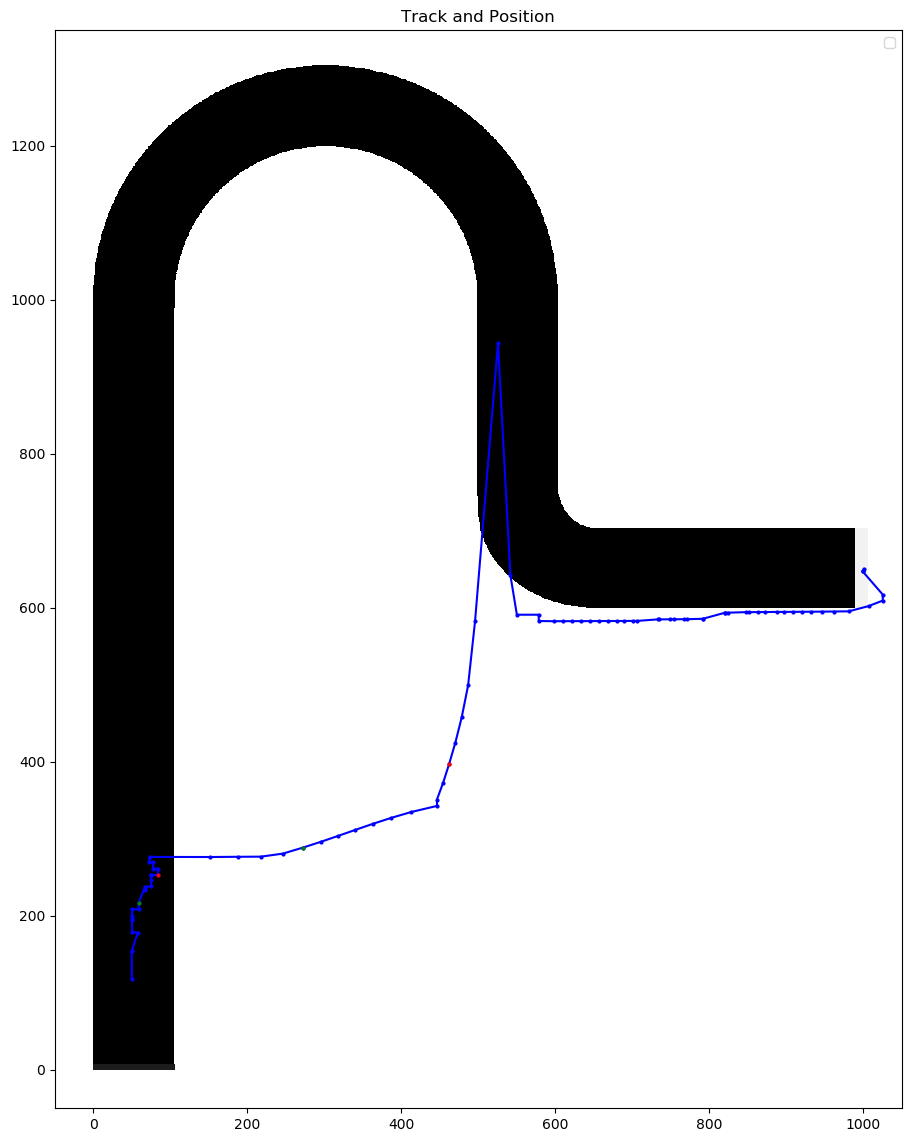

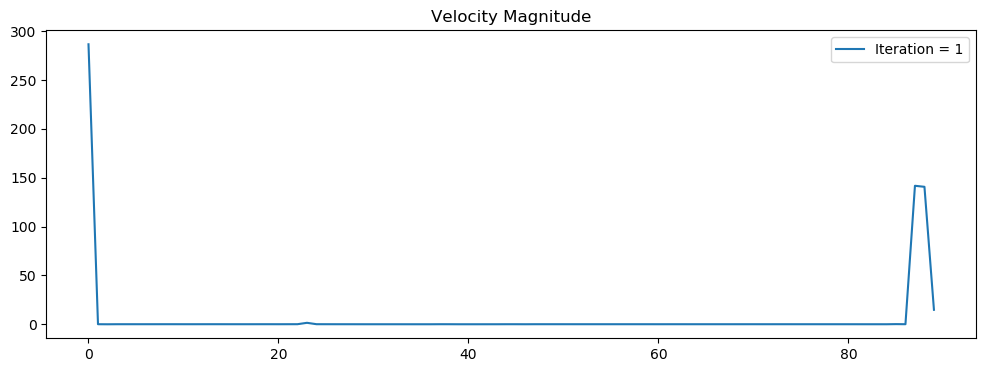

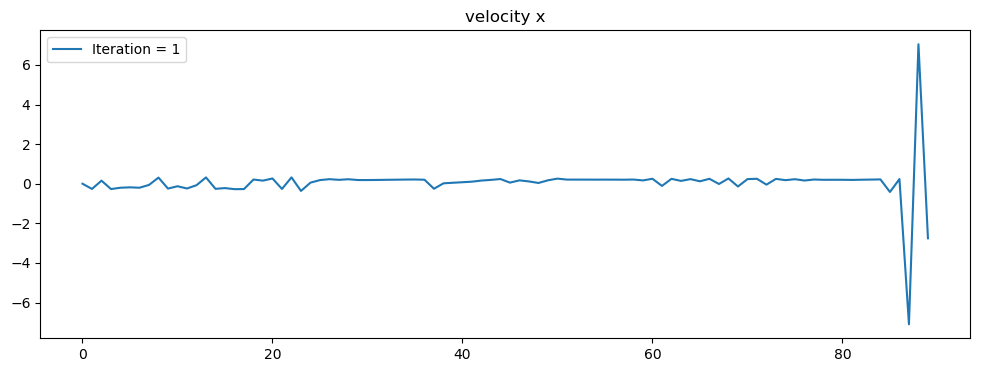

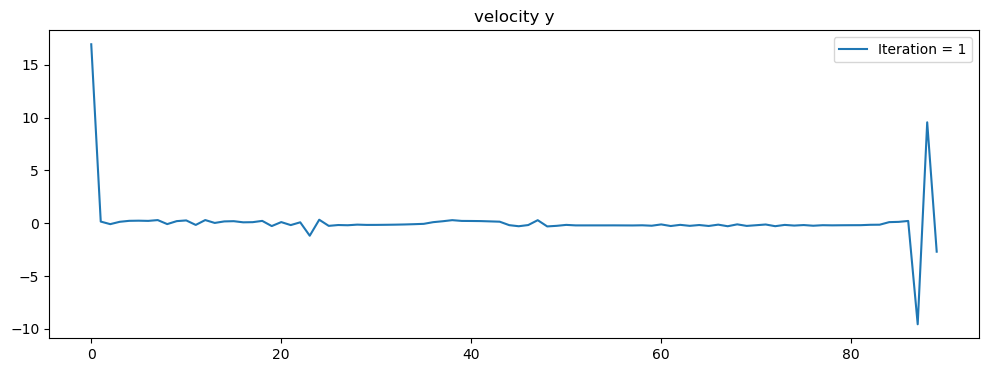

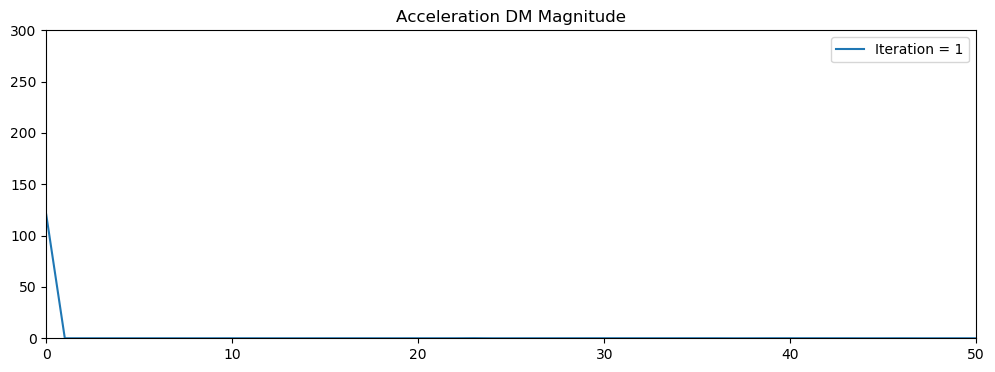

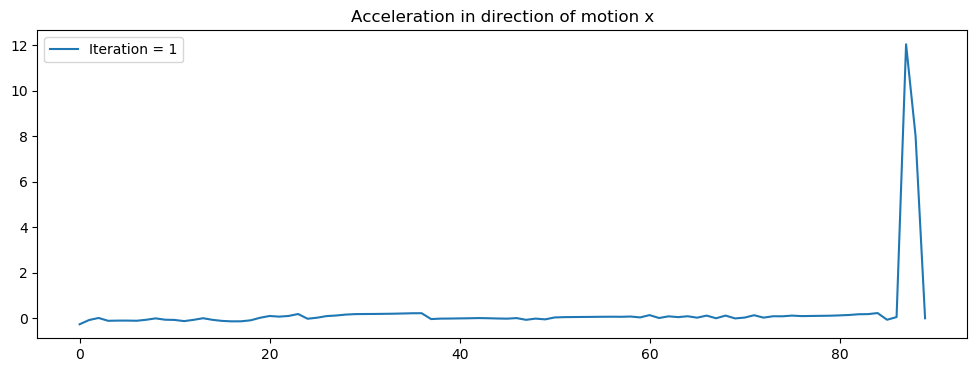

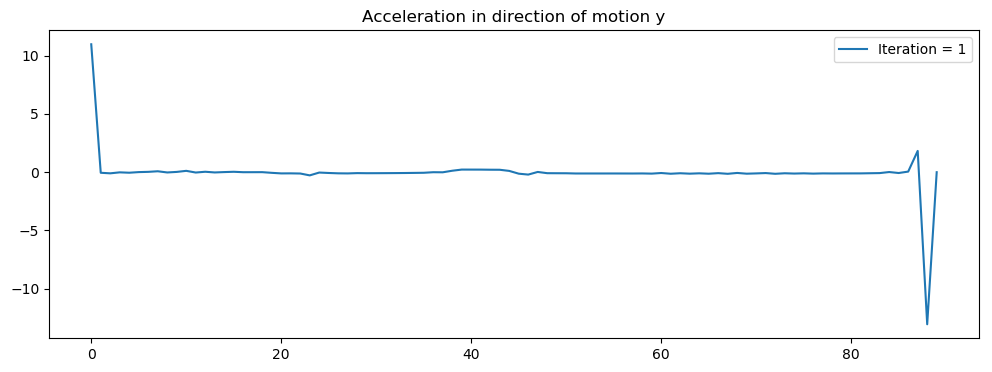

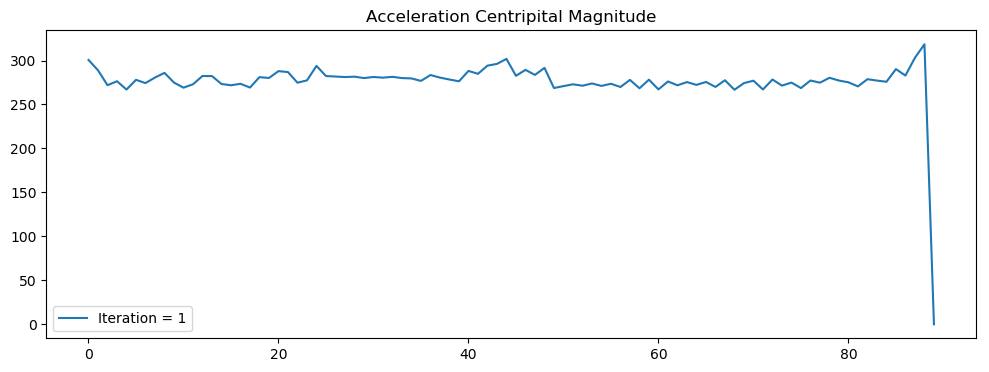

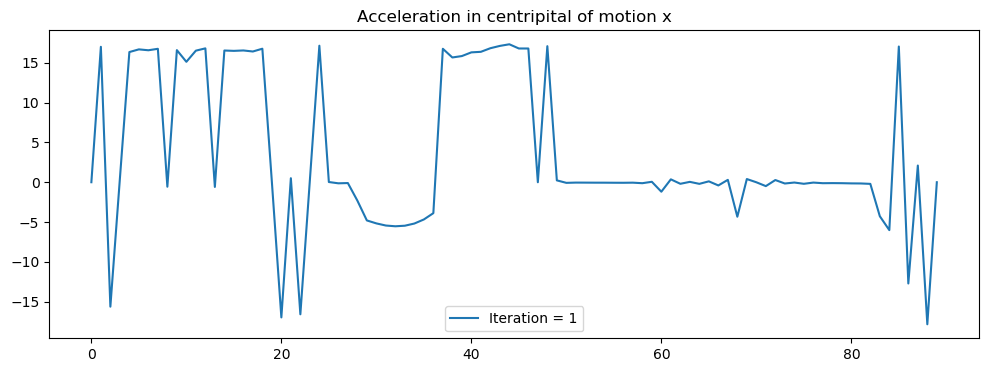

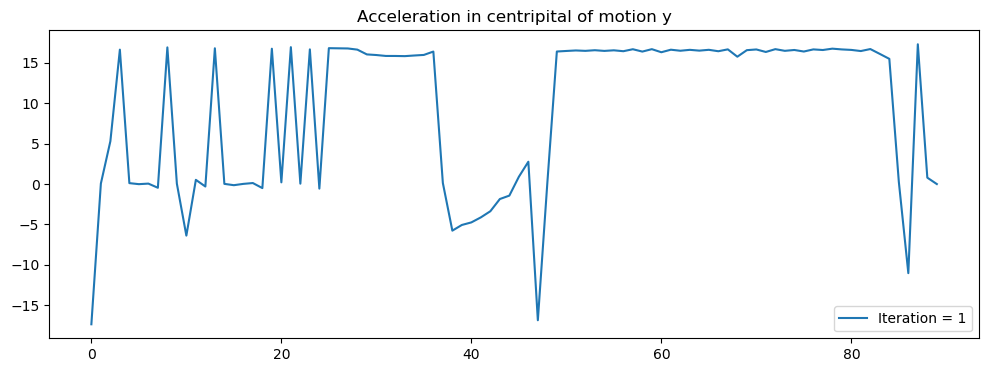

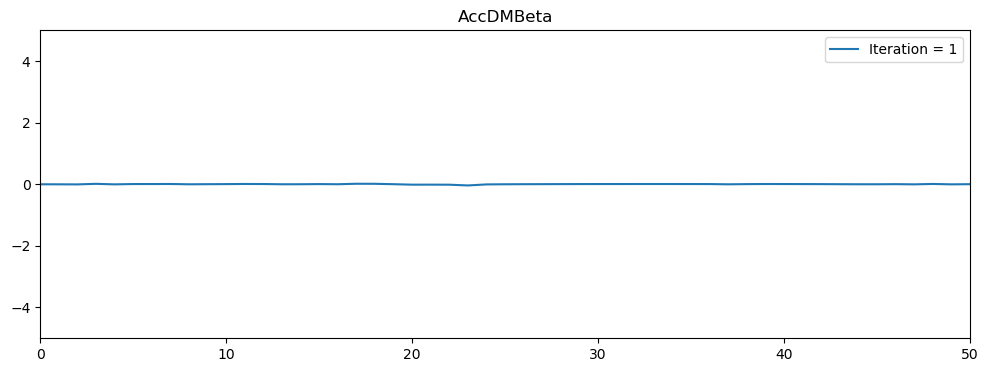

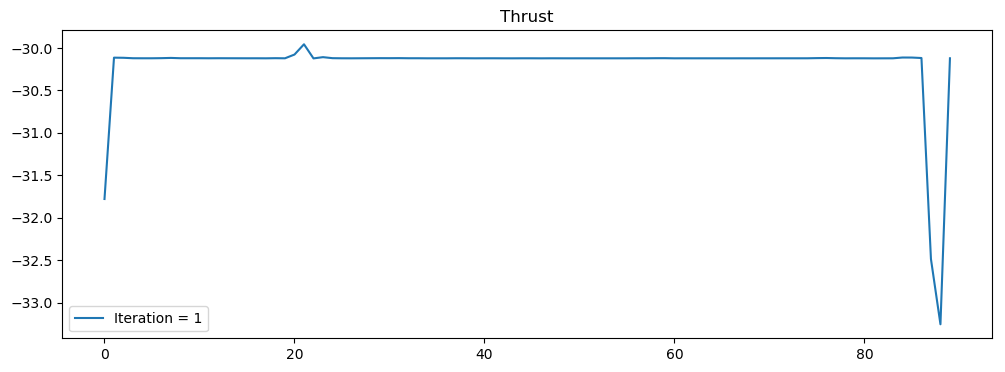

PyObject <matplotlib.legend.Legend object at 0x133085c90>

# Appendix


import java.util.*;

public class ImageMain {

	public static void main(String[] args) throws IOException {
		Image image = ImageIO.read(new File("Image.bmp"));
		BufferedImage img = new BufferedImage(image.getWidth(null), image.getHeight(null), BufferedImage.TYPE_BYTE_GRAY);

		int w = img.getWidth();
		int h = img.getHeight();

		//Create array to of bitmap
		int[][] array = new int[w][h];
		Raster raster = ((BufferedImage) image).getData();
		for (int j = 0; j < w; j++) {
			for (int k = 0; k < h; k++) {
				array[j][k] = raster.getSample(j, k, 0);
			}
		}

		PrintWriter pw = new PrintWriter(new File("Track.csv"));
		StringBuilder sb = new StringBuilder();

		//Write file to csv
		for (int i = 0; i < array[0].length; i++) {
			for (int u = 0; u < array.length; u++) {
				sb.append(array[u][i]);
				sb.append(',');
				if(u == array[0].length-1){
					sb.append('\n');
				}
			}
		}
		pw.write(sb.toString());
		pw.close();
		System.out.println("done!");
	}
}
